# Part 1: Introduction and Data Exploration

## Introduction


In this Notebook, we will analyse a dataset containing video game sales data. The dataset includes information about various video games, including Name, Platform, Year, Genre, Publisher, different region sales and total global sales.



## Data Exploration
Let's start by loading the dataset and performing basic data exploration to get an overview of the data.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df = pd.read_csv('vgsales.csv')
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [3]:
print("\nDataset dimensions:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Dataset dimensions:
Number of rows: 16598
Number of columns: 11


In [4]:
print("\nData types:")
print(df.dtypes)


Data types:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.04

This report was generated using the "profilereport" tool. The report provides a comprehensive overview of the dataset, highlighting various statistics, visualizations, and insights to help understand the data better. 

In [7]:
report = pp.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Part 2: Data Preprocessing

## Handling Missing Values and Duplicates

Removing rows with missing values in the 'Year' column.


In [8]:
df.dropna(subset=['Year'], inplace=True)

To ensure that we focus on the most relevant data for our analysis, we will filter the DataFrame to include only rows with 'Year' values up to and including 2016. The reason for this filtering is that any data beyond 2016 might lack complete information or be subject to potential biases, making it less useful for our current analysis. By limiting the data to the year 2016 or earlier, we can work with a more reliable and comprehensive dataset for our exploration and modeling tasks.

In [9]:
df = df.loc[df['Year'] <= 2016]

To handle missing data in the "Publisher" column, we can replace the NaN (Not a Number) values with "Unknown" since some of the existing entries are already assigned to "Unknown." By doing this, we can create a consistent representation for missing values throughout the column

In [10]:
df.loc[df['Publisher'].isnull(), 'Publisher'] = 'unknown'
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


By removing duplicates if theres any, we can ensure that each observation in the dataset is unique and avoid any potential bias or inaccuracies in our analysis.

In [11]:
df.drop_duplicates()

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16323 rows x 11 columns]

## Visualisation

### CountPlots

In [12]:
%matplotlib inline
def countplot(data, string, xy, top_n=None, ax=None):
    # Calculate the counts for each category in the specified column
    category_counts = data[string].value_counts()
    # Sort the categories based on the counts in descending order
    sorted_categories = category_counts.sort_values(ascending=False).index
    
    # 'top_n' parameter allows you to display only the top N categories in the countplot
    if top_n is not None:
        sorted_categories = sorted_categories[:top_n]
        title = f'Countplot of Top {top_n} {string}'
    else:
        title = f'Countplot of {string}'
        
    # Depending on 'xy', the countplot is created with x-axis or y-axis as the specified column        
    if xy == 'x':
        # Create a countplot with x-axis as the specified column
        sns.countplot(x=string, data=data, palette='Spectral', order=sorted_categories, ax=ax)
    
    if xy == 'y':
        # Create a countplot with y-axis as the specified column
        sns.countplot(y=string, data=data, palette='Spectral', order=sorted_categories, ax=ax)
    # Set title
    ax.set_title(title)

In [13]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [14]:
def plot_countplots(data) :
# Create a subplot for the countplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    plt.subplots_adjust(wspace=0.3)  # Adjust the spacing between subplots
    # Plot the countplot for Genre
    countplot(data, 'Genre', 'y', ax=axs[0])
    # Plot the countplot for Platform (showing only the top 10)
    countplot(data, 'Platform', 'y', top_n=10, ax=axs[1])
    plt.show()

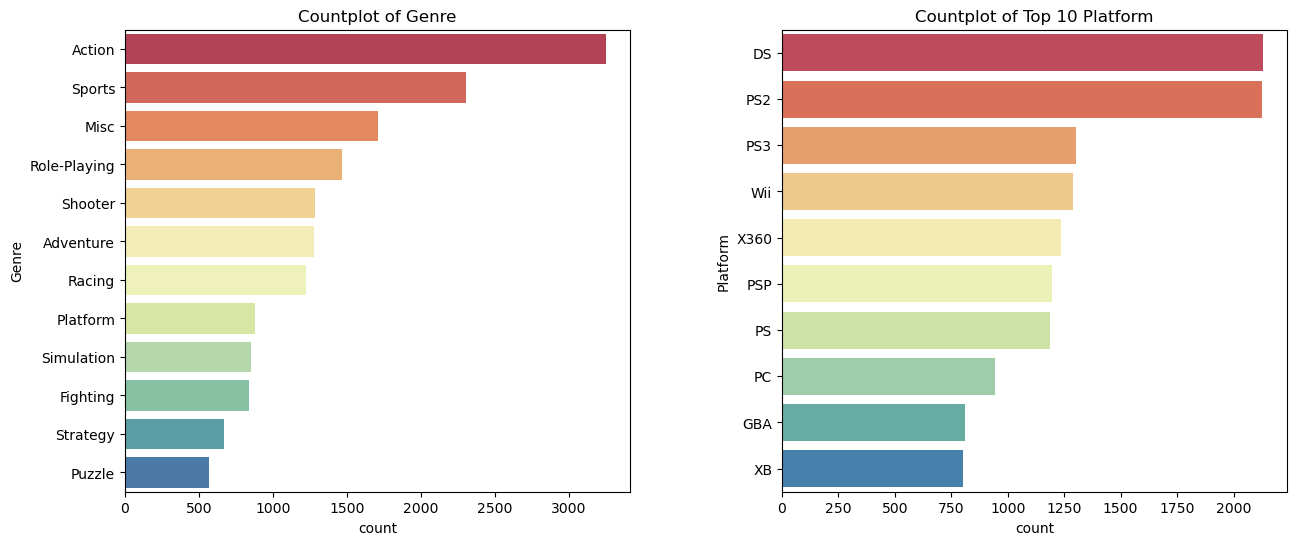

In [15]:
plot_countplots(df)

The two plots Above illustrate the most popular genres and platforms in the dataset:
both plot showcases a bar chart displaying the distribution of video game genres/Platform based on their frequency of occurrence in the dataset. According to the charts, it is evident that the Action genre stands out as the most popular among all the genres. As for the gaming platforms, the Nintendo DS takes the lead as the most popular choice, closely followed by the PlayStation 2 (PS2).

### Stacked Bar Plot and Heatmap

In [16]:
# Function to create a stacked bar plot showing the number of different genre games releases by year
def plot_stackedBarplot(data):
    # Create a pivot table to aggregate the count of games released by year and genre
    pivot_table = data.pivot_table(index='Year', columns='Genre', values='Rank', aggfunc='count', fill_value=0)
    # Create a figure with a stackedBarplot plot
    plt.figure(figsize=(10, 6))
    pivot_table.plot(kind='bar', stacked=True, cmap='tab20')
    # Set x and y label
    plt.xlabel('Year of Release')
    plt.ylabel('Number of Games')
    # Set title
    plt.title('Number of Game Releases by Year and Genre (Stacked Bar Plot)')
    # Set the x-axis ticks to display the year values(removing the decimal)
    plt.xticks(range(len(pivot_table.index)), pivot_table.index.astype(int), rotation=90)
    #Show legend
    plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Function to create a heatmap showing the number of different genre games releases by year
def plot_heatmap(data):
    # Create a pivot table to aggregate the count of games released by year and genre
    pivot_table = data.pivot_table(index='Year', columns='Genre', aggfunc='size', fill_value=0)
    #assign a colour palette
    palette = sns.light_palette("green", as_cmap=True)
    # Create a figure with a heatmap plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap=palette, fmt='d')
    # Set the y-axis ticks to display the year values(removing the decimal)
    plt.yticks(range(len(pivot_table.index)), pivot_table.index.astype(int))
    # Set title
    plt.title('Number of Game Releases by Year and Genre (Heatmap)')
    plt.show()

<Figure size 1000x600 with 0 Axes>

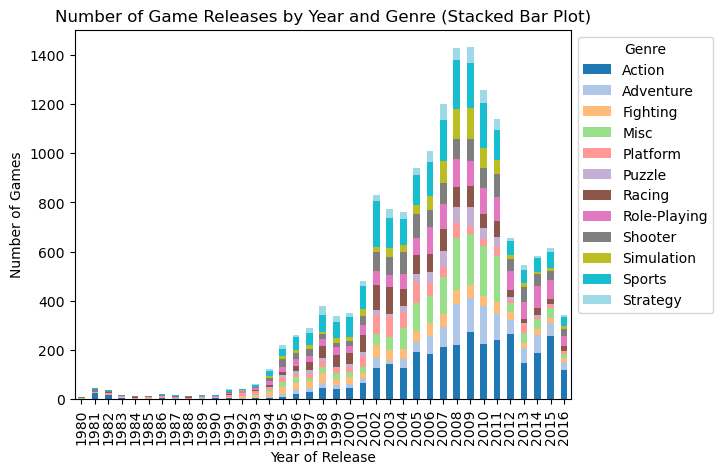

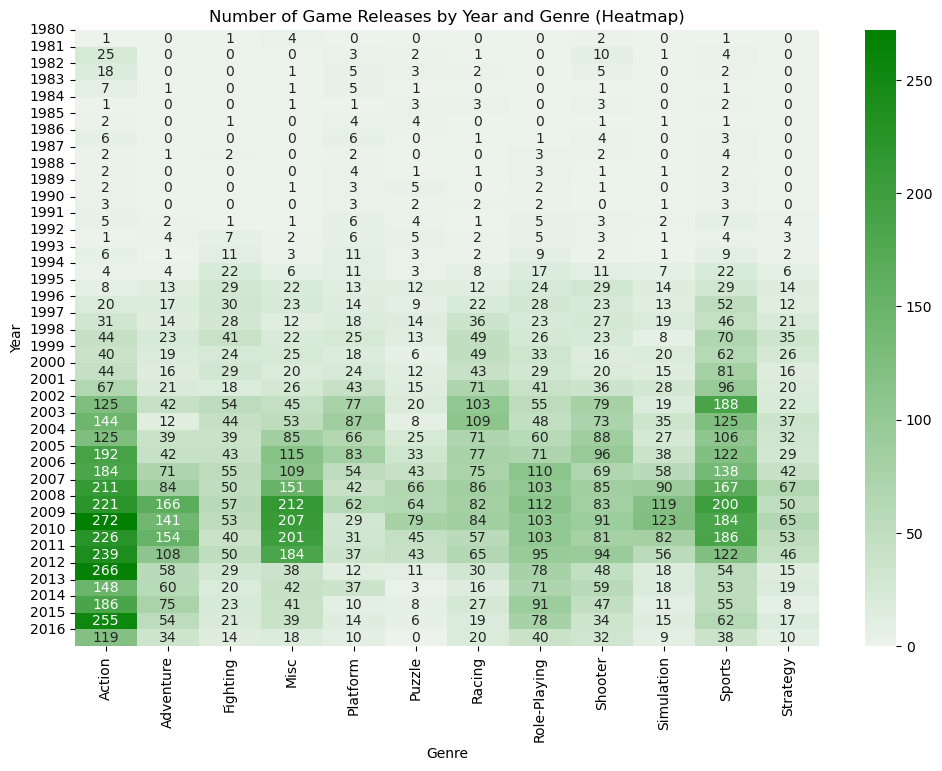

In [17]:
plot_stackedBarplot(df)
plot_heatmap(df)

The two plots Above provide a comprehensive view of the number of different genre games released over the years:
1. Stacked Bar Plot: Enables easy comparison of the total number of game releases in different years and how the distribution of genres has changed over time. The data indicates a surge in gaming popularity with the highest number of game releases recorded in the years 2008 and 2009. However, the trend shows a decline in subsequent years. One possible explanation for this decline could be the increasing popularity of mobile gaming, especially after the 2010s. The rapid advancements in mobile technology have led to a significant rise in mobile gaming platforms. As the dataset does not include mobile platforms, it might not fully capture the complete picture of the gaming industry's growth.
2. Heatmap:Using color intensity helps visualize the distribution of game releases across genres and how it has evolved over time. The heatmap reveals a consistent popularity of action games throughout the years, with a noticeable decline in the number of releases for other genres, especially miscellaneous and sports games, particularly after the year 2011. This trend suggests the emergence of new, non-traditional game genres that might have gained prominence over time.

### Bar charts

In [18]:
def barplot(data, x, y, ax=None):
    # Group the data by the 'x' column and calculate the sum of the 'y' column for each group
    data_value = data.groupby(by=[x])[y].sum()
    #Reset the index to make the 'x' column a regular column in the DataFrame
    data_value = data_value.reset_index()
    # Sort the DataFrame by the 'y' column in descending order
    data_value = data_value.sort_values(by=[y], ascending=False);
    
    # Check if the 'x' column is 'Publisher' or 'Name', and limit the data to the top 10 values for better visualization
    if x == 'Publisher' or x == 'Name':
        data_value = data_value[:10]
        rotation = 45
        ha = 'right'
        fontsize = 7
    else:
        rotation = 90
        ha = 'center'
        fontsize = None;
    # If the 'ax' parameter is not provided, create a new figure and axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        
    # Create a bar plot using seaborn's barplot function, setting the color palette based on the 'y' values
    sns.barplot(x=x, y=y, data=data_value, palette=colors_from_values(data_value[y], "YlOrRd"), ax=ax)
    
    # Set the axis labels and title based on the 'x' and 'y' column names
    ax.set_xlabel(f'{x}')
    ax.set_ylabel(f'{y}')
    ax.set_title(f'{y} by {x}') 

    # Set the x-axis tick positions and labels with proper rotation and alignment
    ax.set_xticks(range(len(data_value[x])))
    ax.set_xticklabels(data_value[x].astype(int) if x == 'Year' else data_value[x], rotation=rotation, ha=ha, fontsize=fontsize)
    return ax

In [19]:
# Function to create bar plots for sales data (Global_Sales, NA_Sales, EU_Sales, JP_Sales, Other_Sales) against other categorical  data
def plot_salesPlots(data,string):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.3, hspace=0.6)  # Adjust the spacing between subplots
    # Plot Global_Sales
    barplot(data,string,'Global_Sales', ax=axs[0, 0])
    # Plot NA_Sales
    barplot(data,string,'NA_Sales', ax=axs[0, 1])
    # Plot EU_Sales
    barplot(data,string,'EU_Sales', ax=axs[1, 0])
    # Plot JP_Sales
    barplot(data,string,'JP_Sales', ax=axs[1, 1])
    # Plot Other_Sales
    barplot(data,string,'Other_Sales', ax=axs[2, 0])
    axs[2, 1].axis('off')
    plt.show()

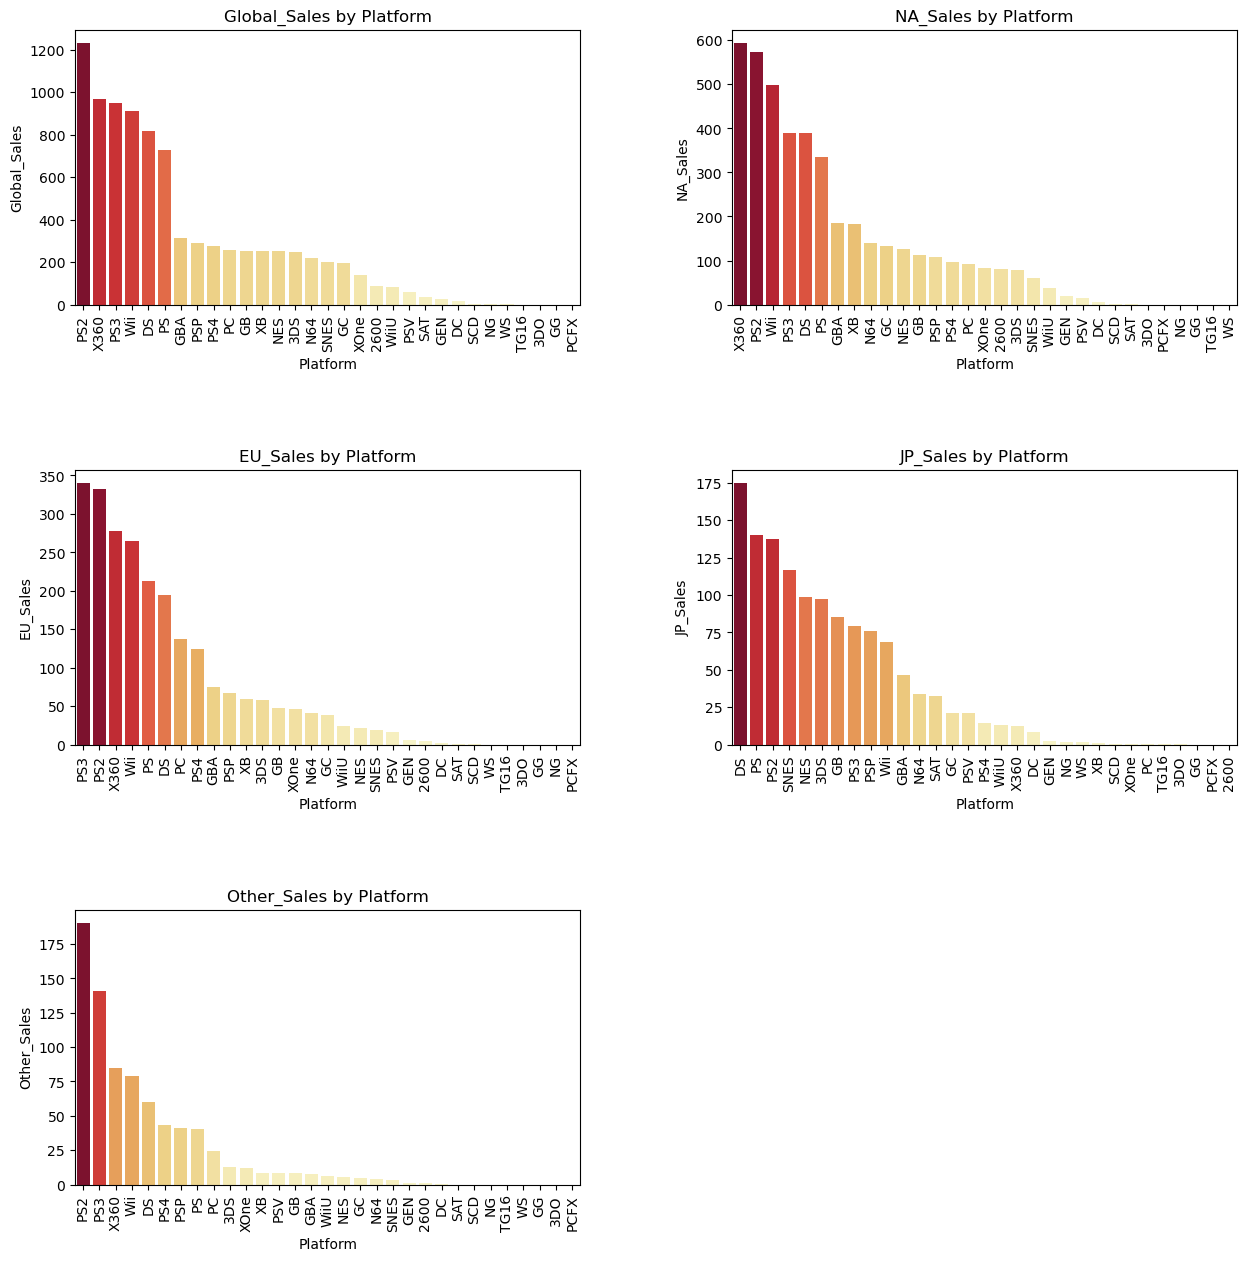

In [20]:
plot_salesPlots(df,'Platform')

The bar charts Above depict the sales of various gaming platforms in different regions, revealing evident preferences unique to each area. Notably, the Xbox 360 (X360) dominates the North American market as the most popular platform. On the other hand, in Europe, the PlayStation 3 (PS3) and PlayStation 2 (PS2) take the lead in terms of sales. In contrast, the Japanese market favors the Nintendo DS (DS) as its top choice.

Even though the Nintendo DS (DS) had the highest number of game releases, its global sales were lower compared to X360, PS3, PS2, and Wii. Overall, the PlayStation 2 (PS2) emerges as the platform with the highest global sales. even x360, ps3,wii is higher than ds.

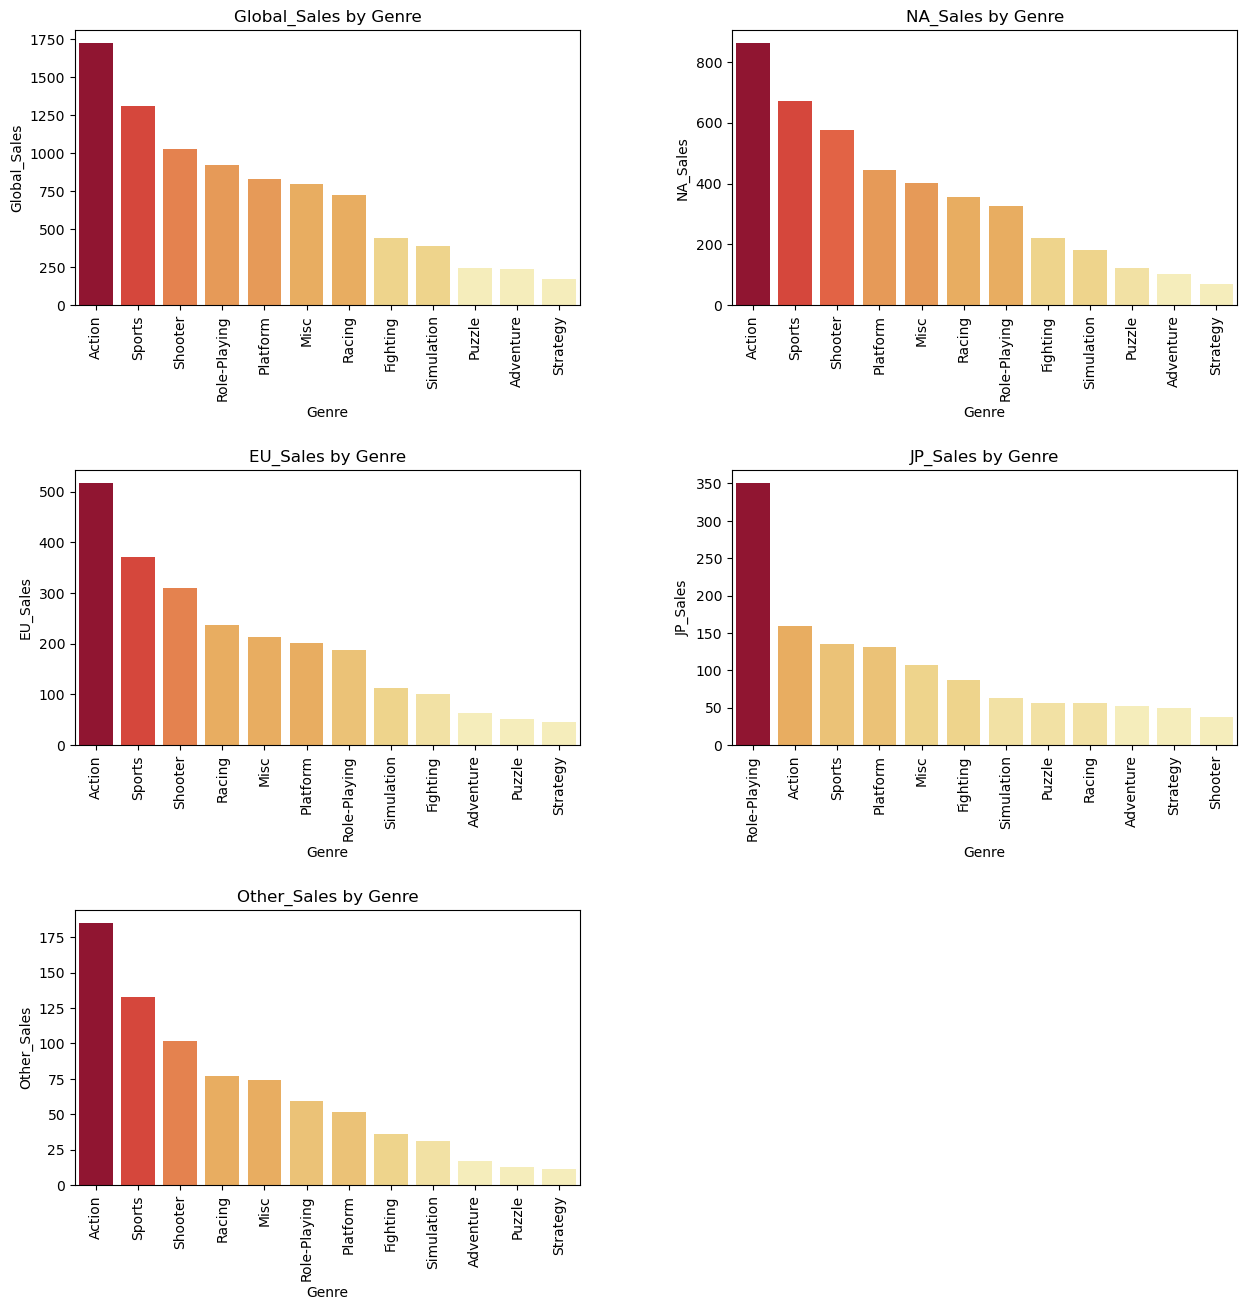

In [21]:
plot_salesPlots(df,'Genre')

The bar charts above illustrate the sales of different gaming genres in various regions. It is evident that North America (NA), Europe (EU), and other regions share a similar pattern, with action, sports, and shooter genres ranking as the top three in terms of sales, followed by some minor variations in the remaining genres. However, the Japanese market (JP) stands out with a distinct preference for role-playing games (RPGs), surpassing the second-highest genre, action, by more than double in terms of sales. This stark difference indicates that the target audience in Japan differs significantly from the rest of the world when it comes to gaming preferences.

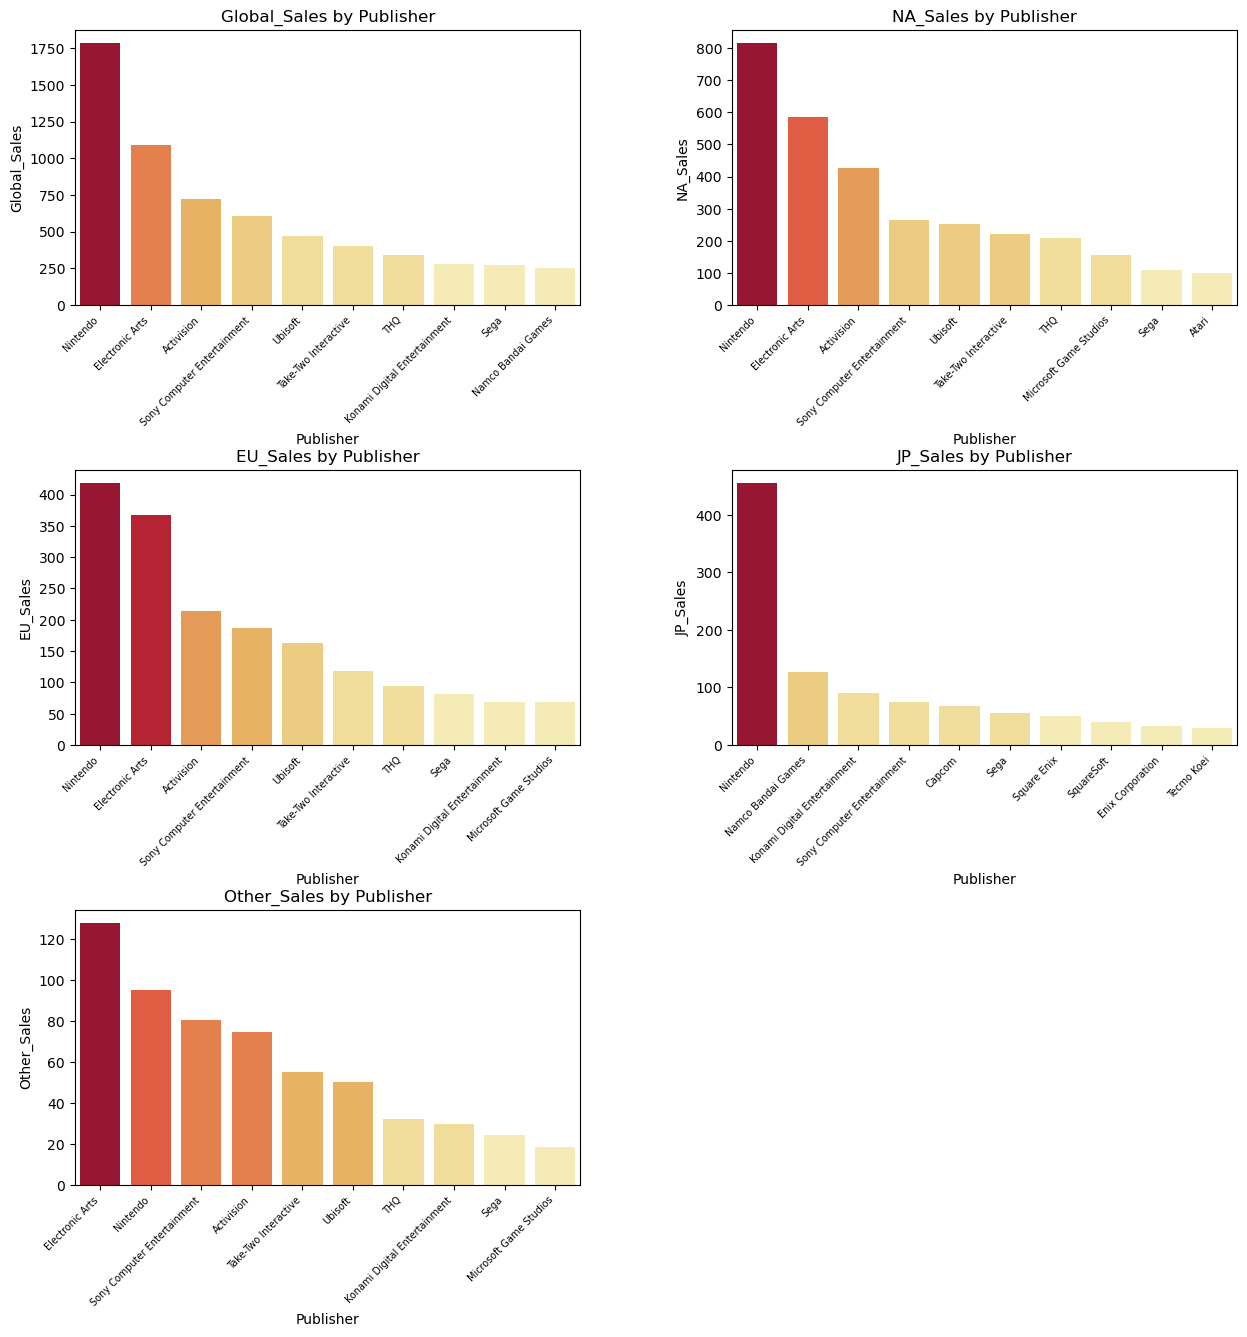

In [22]:
plot_salesPlots(df,'Publisher')

The presented above charts provide an overview of the sales of different publishers in various regions. The data clearly indicates that Nintendo emerges as the most popular publisher in the main regions. Notably, the majority of sales in Japan are attributed to Japanese publishers. This highlights the significant influence of Nintendo in the gaming market continues to hold a prominent position as a leading publisher.

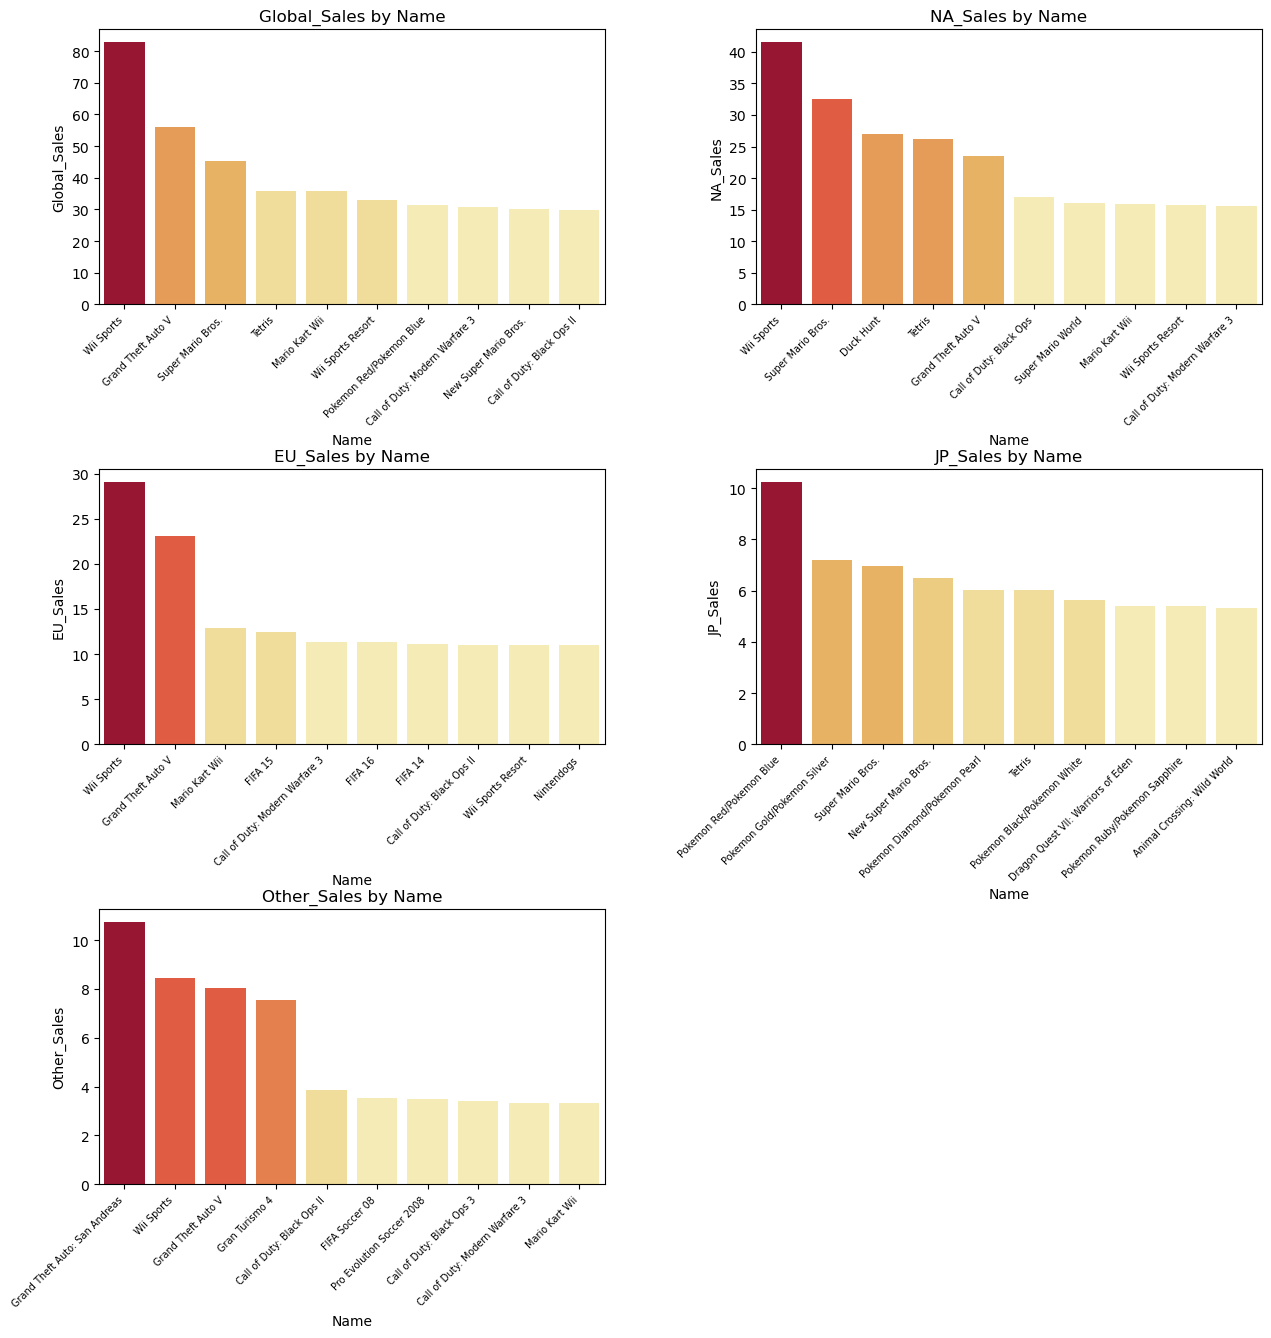

In [23]:
plot_salesPlots(df,'Name')

The bar charts above presented above offer valuable insights into the sales performance of various games across different regions. Notably, the data highlights that "Wii Sports," published by Nintendo, emerges as the most popular game overall. However, again the Japanese market shows a particular inclination towards RPGs, leading to greater attraction to Pokemon games. Furthermore, an intriguing pattern emerges when considering the publishers of these successful games. The majority of titles displayed in the charts originate from either Nintendo or Electronic Arts (EA), signifying their dominance in the gaming industry. One notable exception to this trend is "GTA5",which also enjoys significant popularity and success. In conclusion, the bar charts provide a comprehensive overview of game sales, revealing Nintendo's and EA's prominent roles as major players in the market, while acknowledging the unique preferences of the Japanese audience for RPGs and Pokemon games.

### Pie Chart

In [24]:
# Function to create a pie chart showing the proportion of sales by region (NA, EU, JP, Other)
def plot_pie(data):
    # Calculate the total sales for each region across all years
    total_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
    
    # Create a list of labels for the pie chart
    labels = total_sales.index
    
    # Create a list of sizes (sales values) for the pie chart
    sizes = total_sales.values
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Set the title of the pie chart
    plt.title('Proportion of Sales by Region (NA, EU, JP, Other)')
    
    # Show the pie chart
    plt.show()

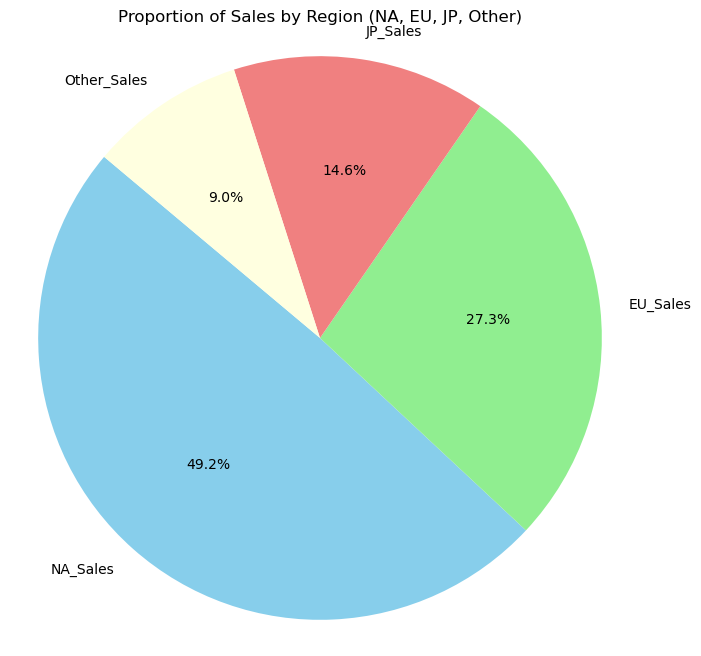

In [25]:
plot_pie(df)

The pie chart above represents the distribution of game sales across different regions as a percentage of the total global sales. Notably, the chart clearly illustrates that North America (NA) accounts for nearly 50% of the total global sales, signifying its significant contribution to the gaming industry.

### Line Chart

In [26]:
# Function to create a line plot showing sales data (NA_Sales, EU_Sales, JP_Sales, Other_Sales) over the years
def plot_line(data):
    # Melt the DataFrame to convert sales columns into a single column
    sales_data = data.groupby('Year').agg({
        'NA_Sales': 'sum',
        'EU_Sales': 'sum',
        'JP_Sales': 'sum',
        'Other_Sales': 'sum'
    }).reset_index()
    
    melted_df = sales_data.melt(id_vars='Year', var_name='Region', value_name='Sales')
    
    # Create a figure and axes
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    
    # Create a multiline graph using sns.lineplot
    sns.lineplot(x='Year', y='Sales', hue='Region', data=melted_df, ax=ax)
    
    # Set axis labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    ax.set_title('Sales by Region and Year')
    
    # Show the legend
    ax.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Show the plot
    plt.show()

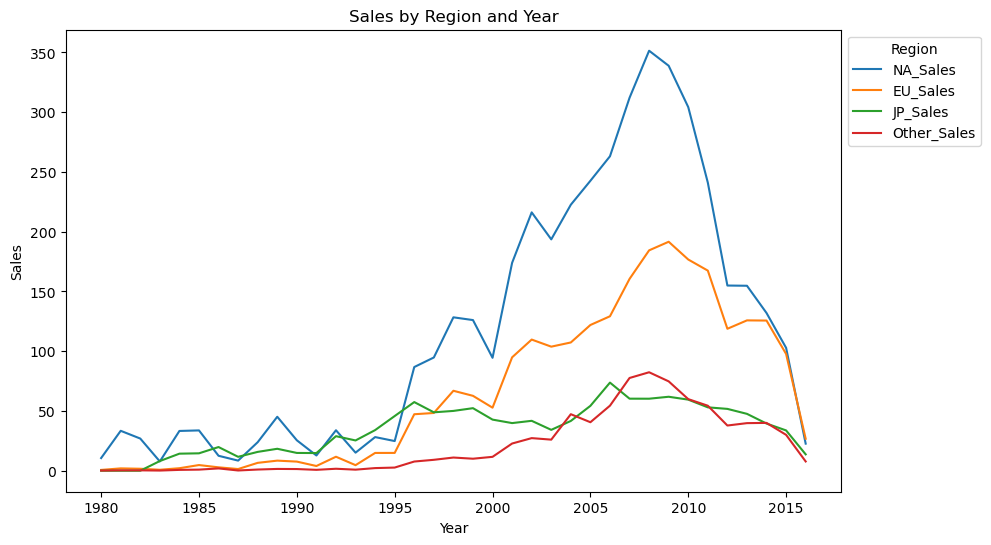

In [27]:
plot_line(df)

The line chart presented above depicts the sales trends in different regions over the years. It is evident that the sales numbers gained and experienced a peak between 2008 and 2009, after that they gradually declined. This pattern is reminiscent of the number of game releases in each year, suggesting a similar structure in both aspects. 

### Table: Most popular games

In [28]:
# Function to find the game with the highest global sales in each year
def best_game(data):
    max_sales_indices = data.groupby('Year')['Global_Sales'].idxmax()
    # Use the indices to get the rows with the highest global sales in each year
    games_with_max_sales = data.loc[max_sales_indices]
    # Select the columns to display in the table
    table_columns = ['Year', 'Name', 'Global_Sales']
    # Convert the DataFrame to a table
    table = tabulate(games_with_max_sales[table_columns], headers='keys', tablefmt='pretty')
    # Display the table
    return print(table)

In [29]:
best_game(df)

+-----+--------+-------------------------------------------+--------------+
|     |  Year  |                   Name                    | Global_Sales |
+-----+--------+-------------------------------------------+--------------+
| 258 | 1980.0 |                 Asteroids                 |     4.31     |
| 239 | 1981.0 |                 Pitfall!                  |     4.5      |
| 89  | 1982.0 |                  Pac-Man                  |     7.81     |
| 421 | 1983.0 |                 Baseball                  |     3.2      |
|  9  | 1984.0 |                 Duck Hunt                 |    28.31     |
|  1  | 1985.0 |             Super Mario Bros.             |    40.24     |
| 127 | 1986.0 |            The Legend of Zelda            |     6.51     |
| 251 | 1987.0 |      Zelda II: The Adventure of Link      |     4.38     |
| 22  | 1988.0 |            Super Mario Bros. 3            |    17.28     |
|  5  | 1989.0 |                  Tetris                   |    30.26     |
| 18  | 1990

The table below displays the most popular games from the years 1980 to 2016. These games have garnered significant sales. The table provides valuable insights into the gaming industry's evolving landscape and the enduring popularity of certain games over the decades.

## Feature Engineering

We will select the relevant features for modeling, which are 'Platform', 'Year', 'Genre', 'Publisher', and the target variable 'Global_Sales'.

In [30]:
data = df.copy()
data = data[['Platform', 'Year','Genre', 'Publisher', 'Global_Sales']]
print(data.head())

  Platform    Year         Genre Publisher  Global_Sales
0      Wii  2006.0        Sports  Nintendo         82.74
1      NES  1985.0      Platform  Nintendo         40.24
2      Wii  2008.0        Racing  Nintendo         35.82
3      Wii  2009.0        Sports  Nintendo         33.00
4       GB  1996.0  Role-Playing  Nintendo         31.37


Next, we encode the categorical features 'Platform', 'Genre', and 'Publisher' using the OrdinalEncoder. This transformation converts unique strings into unique numbers, making it easier for the machine learning models to process the data.

In [31]:
categorical_features = ['Platform', 'Genre', 'Publisher']
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])
print(data.head())

   Platform    Year  Genre  Publisher  Global_Sales
0      26.0  2006.0   10.0      359.0         82.74
1      11.0  1985.0    4.0      359.0         40.24
2      26.0  2008.0    6.0      359.0         35.82
3      26.0  2009.0   10.0      359.0         33.00
4       5.0  1996.0    7.0      359.0         31.37


After encoding, we separate the target variable 'Global_Sales' from the features. Then split the data into training and testing sets using the train_test_split function from scikit-learn.


In [32]:
y = data['Global_Sales']
X = data.drop(columns='Global_Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=24)

# Supervised learning - Regression

Since y is a continous variable, therefore the task will be a regression problem. In this regression problem, we aim to build a model that can accurately predict the global sales of games based on the features like gaming platform, release year, genre, and publisher. The evaluation metrics, such as Mean Squared Error (MSE), help us assess how well the models are performing in terms of minimizing the squared differences between the predicted values and the actual sales

## Model Evaluation

We will evaluate different regression models to find the best model for predicting global game sales. We define a list of classifiers along with their corresponding models for evaluation. The models include Linear Regression, Random Forest Regression, Neural Networks (MLPRegressor), Support Vector Regression, Traditional Gradient Boosting, and Histogram-based Gradient Boosting.

In [33]:
classifiers = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=24)),
    ('Neural Networks', MLPRegressor(max_iter=1000, random_state=24)),
    ('Support Vector Regression', svm.SVR()),
    ('Traditional Gradient Boosting', GradientBoostingRegressor(random_state=24)),
    ('Histogram based Gradient Boosting', HistGradientBoostingRegressor(random_state=24))
]

best_model = None
best_score = np.inf
best_model_name = None

Loop through each classifier and evaluate its performance

In [34]:
for name, clf in classifiers:
    # For models 'Neural Networks' and 'Support Vector Regression', use a Pipeline with StandardScaler as they are sensitive to the scale of input features
    if name == 'Neural Networks' or name == 'Support Vector Regression':
        model = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    else:
        model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.4f}")
    # A lower MSE value indicates better performance because it means that the model's predictions are closer to the actual target values.
    if mse < best_score:
        best_score = mse
        best_model = clf
        best_model_name = name
print("Best Model:", best_model_name)
print("Best Mean Squared Error:", best_score)

Linear Regression - Mean Squared Error: 3.9926
Random Forest - Mean Squared Error: 4.0294
Neural Networks - Mean Squared Error: 3.8179
Support Vector Regression - Mean Squared Error: 4.0731
Traditional Gradient Boosting - Mean Squared Error: 3.6889
Histogram based Gradient Boosting - Mean Squared Error: 3.4888
Best Model: Histogram based Gradient Boosting
Best Mean Squared Error: 3.488763437289989


By the result Histogram based gradient boosting is the best base model for the data.

## Hyperparameter Tuning

After evaluating the models, we will perform hyperparameter tuning on the best model to optimize its performance further. We define a hyperparameter grid. The hyperparameter tuning is essential to optimize the model's performance and ensure accurate predictions of global game sales.

In [36]:
param_grid = {
    'loss': ['squared_error', 'absolute_error', 'poisson'],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_iter': [80, 100, 120],
    'max_leaf_nodes': [31, 40, 20],
    'min_samples_leaf': [30, 40, 20]
}

In [48]:
def randomCV(model,grid,X_train,y_train,X_test,y_test):

    # Create the RandomizedSearchCV instance,Scoring based on mse(smaller = better)
    random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=10,
                                       scoring='neg_mean_squared_error',random_state =24, cv=5, verbose=1, n_jobs=-1)
    
    # Fit the RandomizedSearchCV on the data
    random_search.fit(X_train, y_train)
    
    # Get the best model from RandomizedSearchCV and predict
    best_model_randomized = random_search.best_estimator_
    print("Best Hyperparameters:", random_search.best_params_)
    y_pred = best_model_randomized.predict(X_test)
    
    # Calculate mean squared error (lower better)
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate mean absolute error (lower better)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate R-squared (higher better)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate explained variance score (higher better)
    explained_variance = explained_variance_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print("Explained Variance Score:", explained_variance)
    return y_pred
    
# Function to perform GridSearchCV on the specified model with the given hyperparameter grid
def gridCV(model,grid,X_train,y_train,X_test,y_test):
    
    # Create the GridSearchCV instance,Scoring based on mse(smaller = better)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
    # Fit the GridSearchCV on the data
    grid_search.fit(X_train, y_train)
    
    # Get the best model from GridSearchCV and predict
    best_model_grid_search = grid_search.best_estimator_
    print("Best Hyperparameters:", grid_search.best_params_)
    y_pred = best_model_grid_search.predict(X_test)
    
    # Calculate mean squared error (lower better)
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate mean absolute error (lower better)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate R-squared (higher better)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate explained variance score (higher better)
    explained_variance = explained_variance_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print("Explained Variance Score:", explained_variance)
    return y_pred

### Hyperparameter tuning using RandomisedSearchCV


In [38]:
pred1 = randomCV(best_model, param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 40, 'max_leaf_nodes': 31, 'max_iter': 80, 'loss': 'squared_error', 'learning_rate': 0.3}
Mean Squared Error: 3.4573382909957324
Mean Absolute Error: 0.5428205917063554
R-squared: 0.13705000292435476
Explained Variance Score: 0.13725598485269208


In [39]:
print(pred1)

[1.52945257 0.37576455 0.13107656 ... 1.8459486  0.39203045 0.09023143]


### Hyperparameter tuning using GridSearchCV

In [40]:
pred2 = gridCV(best_model, param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'learning_rate': 0.1, 'loss': 'poisson', 'max_iter': 80, 'max_leaf_nodes': 20, 'min_samples_leaf': 30}
Mean Squared Error: 3.448462069429993
Mean Absolute Error: 0.5265262642409351
R-squared: 0.13926550361578172
Explained Variance Score: 0.13955220957720227


In [42]:
print(pred2)

[1.49739172 0.37014064 0.1233164  ... 1.54176221 0.42761311 0.15406972]
